In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.duplicated().sum()

np.int64(1)

In [6]:
# Supaya bisa memprediksi menggunakan algoritma machine learning
df['smoker_num'] = df['smoker'].map({
    'yes': 1,
    'no': 0,
})

df['gender_num'] = df['sex'].map({
    'male': 1,
    'female': 0,
})

### One Hot Encoding

In [7]:
# Membuat 4 kolom baru berdasarkan nilai region
df['southwest'] = (df['region'] == 'southwest').astype(int)
df['southeast'] = (df['region'] == 'southeast').astype(int)
df['northwest'] = (df['region'] == 'northwest').astype(int)
df['northeast'] = (df['region'] == 'northeast').astype(int)

In [8]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_num,gender_num,southwest,southeast,northwest,northeast
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,1,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0,1,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,0,1,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0,0,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,0,0,1
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,1,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,1,0,0,0


In [9]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges,smoker_num,gender_num,southwest,southeast,northwest,northeast
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,1,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0,1,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,0,1,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0,0,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,0,0,1
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,1,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,1,0,0,0


In [10]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
pd.unique(df['sex'])

array(['female', 'male'], dtype=object)

In [12]:
pd.unique(df['smoker'])

array(['yes', 'no'], dtype=object)

In [13]:
pd.unique(df['region'])

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Persebaran Data

In [14]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [15]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [16]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

### Outlier

In [17]:
# Fungsi remove outlier
def remove_outliers(df, cols, multiplier=1.5):
    df_clean = df.copy()
    
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        # batas bawah & batas atas
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # hanya hapus outlier yg terlalu ekstrim
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

In [18]:
# Kolom yang ingin diperiksa outliernya
cols_with_outliers = ['charges', 'bmi']
df = remove_outliers(df, cols_with_outliers, multiplier=2.0)
print("Jumlah data awal :", len(df))

Jumlah data awal : 1263


### Visualisasi Data

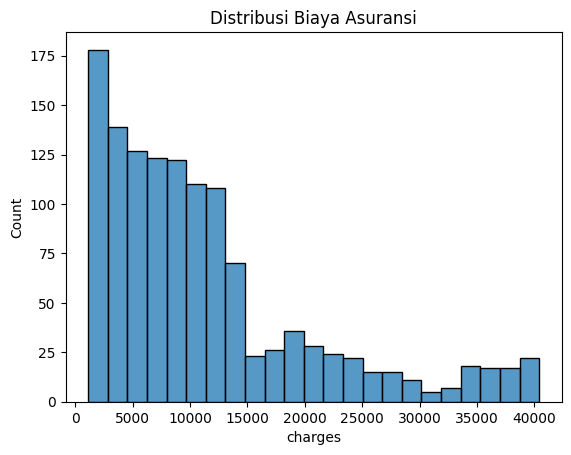

In [19]:
fig = plt.figure()  
ax = sns.histplot(data = df, x='charges')
ax.set_title('Distribusi Biaya Asuransi')
plt.show() 

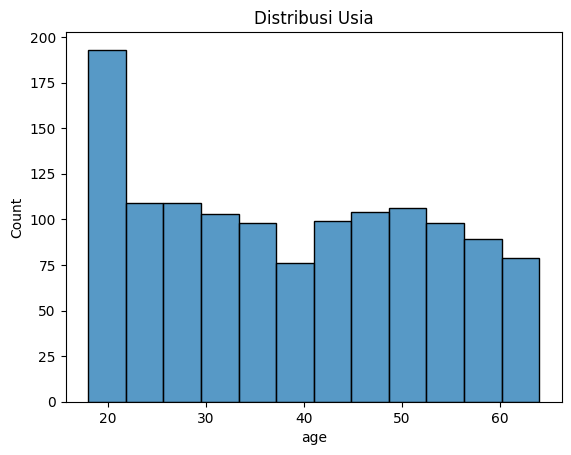

In [20]:
fig = plt.figure()  
ax = sns.histplot(data = df, x='age')
ax.set_title('Distribusi Usia')
plt.show() 

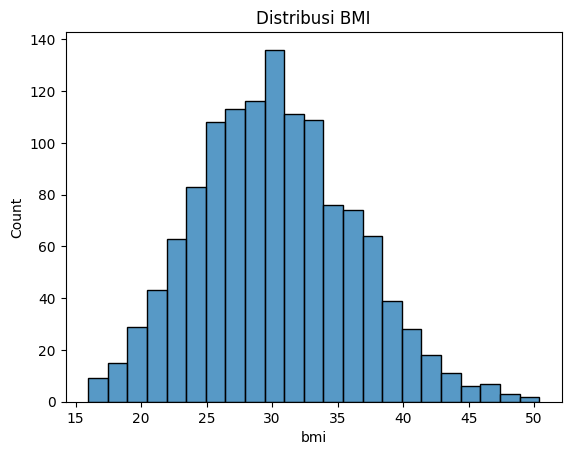

In [21]:
fig = plt.figure()  
ax = sns.histplot(data = df, x='bmi')
ax.set_title('Distribusi BMI')
plt.show() 

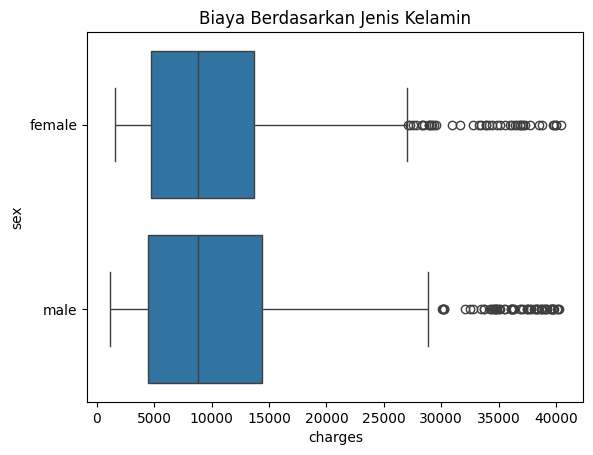

In [22]:
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'charges', y = 'sex')
ax.set_title('Biaya Berdasarkan Jenis Kelamin')
plt.show() 

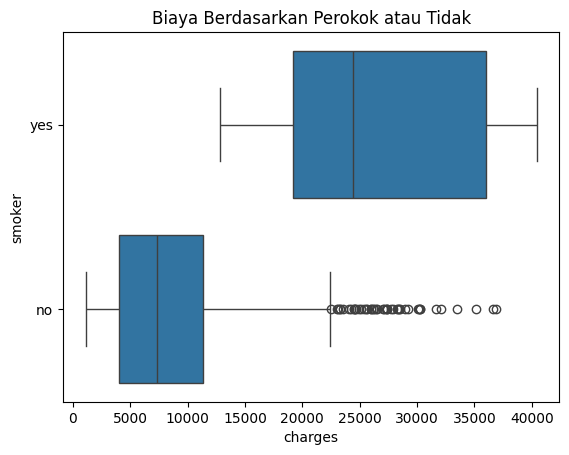

In [23]:
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'charges', y = 'smoker')
ax.set_title('Biaya Berdasarkan Perokok atau Tidak')
plt.show() 

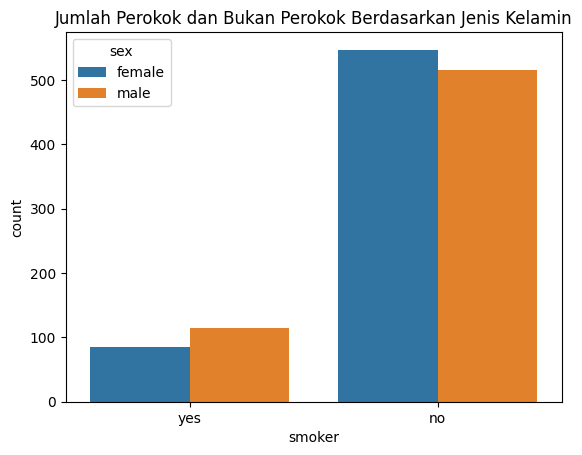

In [24]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='smoker', hue = 'sex')
ax.set_title('Jumlah Perokok dan Bukan Perokok Berdasarkan Jenis Kelamin')
plt.show() 

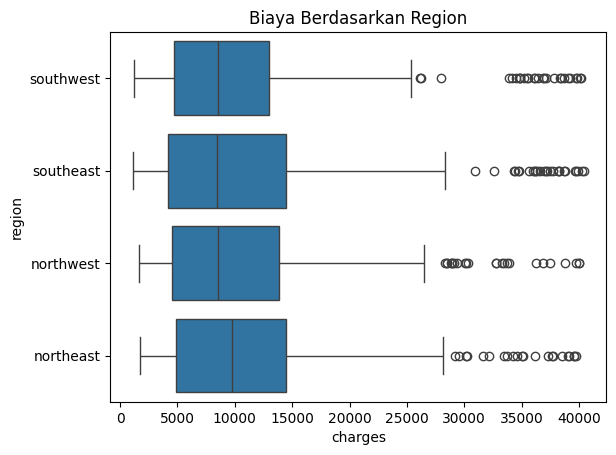

In [25]:
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'charges', y = 'region')
ax.set_title('Biaya Berdasarkan Region')
plt.show() 

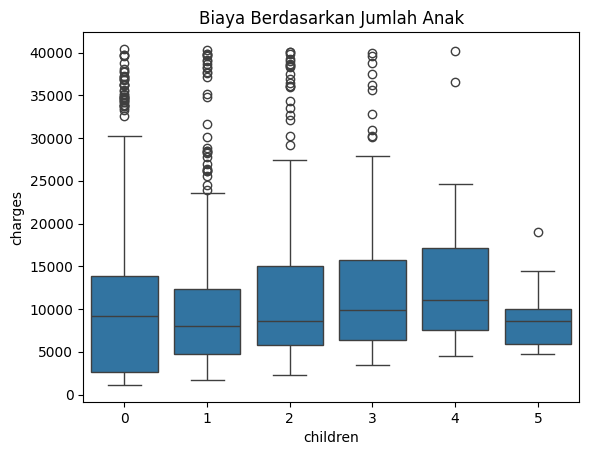

In [26]:
fig = plt.figure()  
ax = sns.boxplot(data = df,  x = 'children', y = 'charges')
ax.set_title('Biaya Berdasarkan Jumlah Anak')
plt.show() 

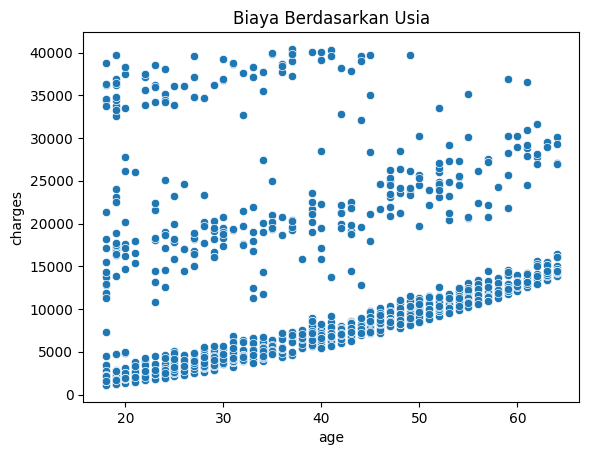

In [27]:
fig = plt.figure()  
ax = sns.scatterplot(data = df, x='age', y = 'charges')
ax.set_title('Biaya Berdasarkan Usia')
plt.show() 

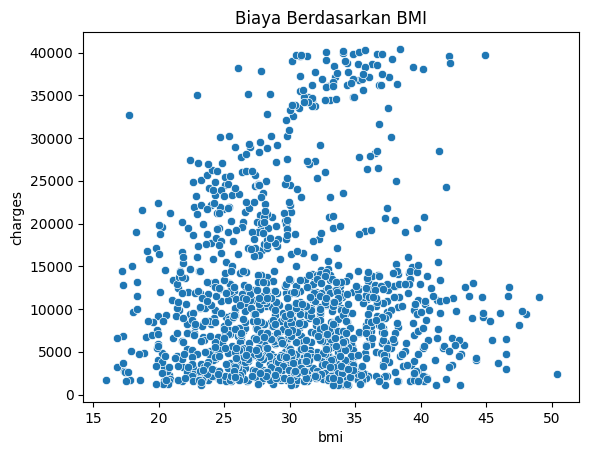

In [28]:
fig = plt.figure()  
ax = sns.scatterplot(data = df, x='bmi', y = 'charges')
ax.set_title('Biaya Berdasarkan BMI')
plt.show() 

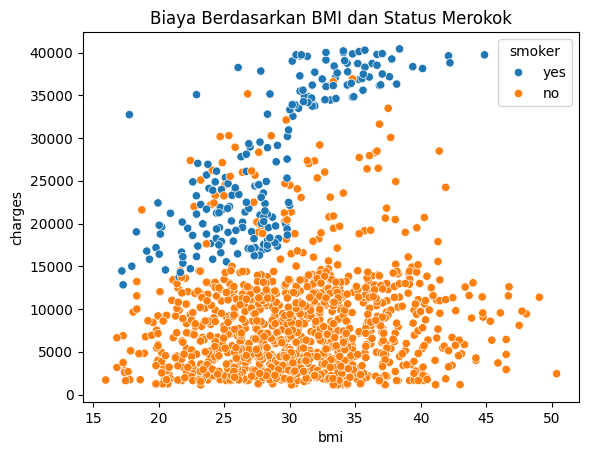

In [29]:
fig = plt.figure()
ax = sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
ax.set_title('Biaya Berdasarkan BMI dan Status Merokok')
plt.show()

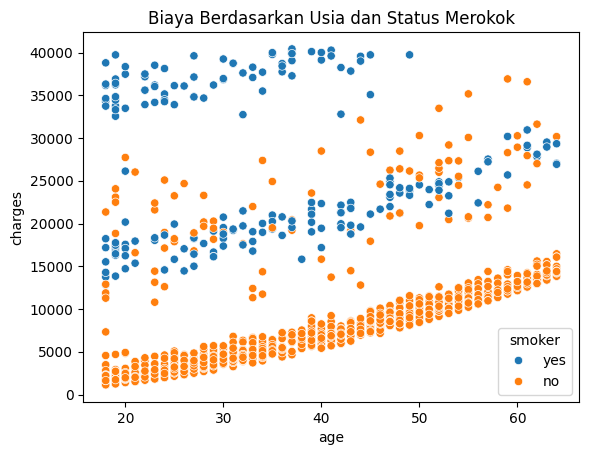

In [30]:
fig = plt.figure()
ax = sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
ax.set_title('Biaya Berdasarkan Usia dan Status Merokok')
plt.show()

In [31]:
df.dtypes

age             int64
sex            object
bmi           float64
children        int64
smoker         object
region         object
charges       float64
smoker_num      int64
gender_num      int64
southwest       int64
southeast       int64
northwest       int64
northeast       int64
dtype: object

### Heatmap Correlation

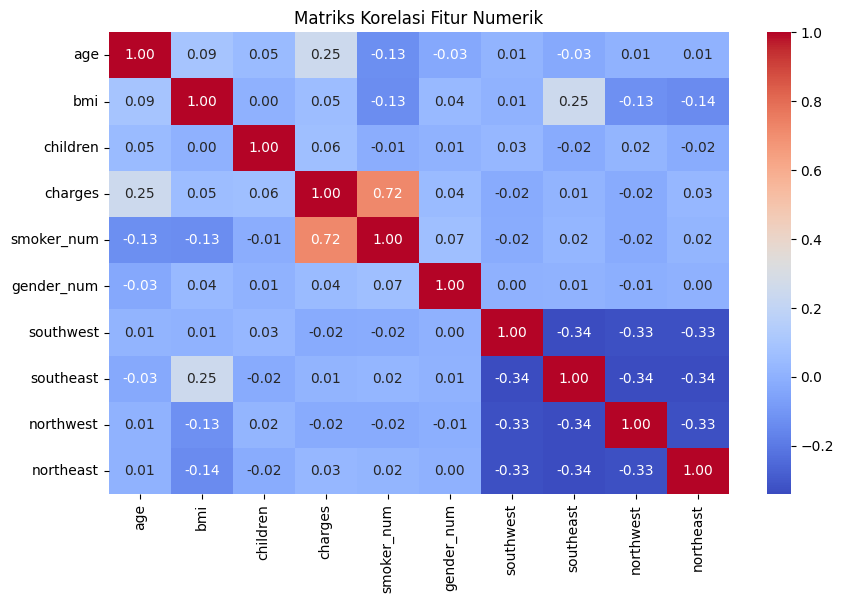

In [32]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur Numerik')
plt.yticks(rotation=0)
plt.show()

Dapat disimpulkan, bahwa Perokok sangat berpengaruh pada Harga Asuransi (charges)

# PEMODELAN

### Split Data

In [33]:
df_clean = df.drop(columns=['sex', 'smoker', 'region'])

In [34]:
df_clean.head()

,age,bmi,children,charges,smoker_num,gender_num,southwest,southeast,northwest,northeast
0,19,27.900,0,16884.92400,1,0,1,0,0,0
1,18,33.770,1,1725.55230,0,1,0,1,0,0
2,28,33.000,3,4449.46200,0,1,0,1,0,0
3,33,22.705,0,21984.47061,0,1,0,0,1,0
4,32,28.880,0,3866.85520,0,1,0,0,1,0


In [35]:
X = df_clean.drop(columns=['charges'])   
y = df_clean['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Pemodelan Algoritma

In [36]:
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "KNNRegressor": KNeighborsRegressor(n_neighbors=5)
}

### Metrik Algoritma

In [37]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test) 
    
    mae = mean_absolute_error(y_test, y_pred)
    mse_val  = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse_val)
    r2 = r2_score(y_test, y_pred)
    
    results.append([
        name, 
        round(mae, 2), 
        round(mse_val, 2), 
        round(rmse, 2), 
        round(r2, 4)
    ])

In [38]:
results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R²"])
print(results_df)

              Model      MAE          MSE     RMSE      R²
0  LinearRegression  3746.83  35124457.30  5926.59  0.6319
1      RandomForest  2870.50  27776408.25  5270.33  0.7089
2  GradientBoosting  2682.33  24491716.01  4948.91  0.7433
3      KNNRegressor  6045.25  84002145.36  9165.27  0.1197


### Hyperparameter Tuning

Disini kami menggunakan Randomized Search untuk Tuning Algoritma nya dikarenakan dianggap lebih baik daripada Grid Search

In [39]:
# Parameter untuk masing masing algoritma
param_linear = {
    "fit_intercept": [True, False],
    "copy_X": [True, False]
}

param_rf = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

param_gb = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "n_estimators": [100, 200, 300],
    "max_depth": [2, 3, 4],
    "subsample": [0.7, 0.8, 1.0]
}

param_knn = {
    "n_neighbors": list(range(2, 31)),
    "weights": ["uniform", "distance"],
    "p": [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

Menginisasi beberapa algortima dengan params yang sudah dibuat agar tidak terjadi perulangan kode, cukup jalankan perulangan yang ngulang dengan isi models dibawah dengan parameter yang telah ditentukan diatas

In [40]:
models = {
    "LinearRegression": (LinearRegression(), param_linear),
    "RandomForest": (RandomForestRegressor(random_state=42), param_rf),
    "GradientBoosting": (GradientBoostingRegressor(random_state=42), param_gb),
    "KNNRegressor": (KNeighborsRegressor(), param_knn),
}

Penggunaan RandomizedSearch dengan Cross-Validation = 5 dengan tujuan mengurangi overfitting 

In [41]:
results_after = {}

for name, (model, params) in models.items():
    rnd = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=20,
        cv=5,
        scoring="r2",
        random_state=42,
        n_jobs=-1
    )

    rnd.fit(X_train, y_train)

    best_model = rnd.best_estimator_
    preds = best_model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    results_after[name] = {
        "best_params": rnd.best_params_,
        "best_r2": rnd.best_score_,
        "test_r2": r2,
        "test_rmse": rmse
    }

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [42]:
print("\n==================== HASIL AKHIR ====================")
for name, res in results_after.items():
    print(f"\n{name}")
    print(" CV R2:", round(res["best_r2"], 4))
    print(" Test R2:", round(res["test_r2"], 4))
    print(" Test RMSE:", round(res["test_rmse"], 2))


==================== HASIL AKHIR ====================

LinearRegression
 CV R2: 0.6549
 Test R2: 0.6319
 Test RMSE: 5926.59

RandomForest
 CV R2: 0.7804
 Test R2: 0.7426
 Test RMSE: 4955.66

GradientBoosting
 CV R2: 0.7723
 Test R2: 0.7469
 Test RMSE: 4914.31

KNNRegressor
 CV R2: 0.271
 Test R2: 0.2745
 Test RMSE: 8320.38


## Perbandingan Metrik R2 dan RMSE Before & After Tuning

In [43]:
import pandas as pd

data = []

for row in results:
    name = row[0]
    rmse_before, r2_before = row[3], row[4]

    # Ambil metrik test setelah tuning
    r2_after = results_after[name]["test_r2"]
    rmse_after = results_after[name]["test_rmse"]

    # Hitung persentase perubahan
    r2_pct = ((r2_after - r2_before) / r2_before) * 100
    rmse_pct = ((rmse_before - rmse_after) / rmse_before) * 100

    # Tambahkan ke row baru
    data.append([
        name,
        round(r2_before, 4),
        round(rmse_before, 2),
        round(r2_after, 4),
        round(rmse_after, 2),
        round(r2_pct, 2),
        round(rmse_pct, 2)
    ])

# Buat DataFrame dengan kolom perbandingan + persentase improvement
columns = ["Model", "R2 Before", "RMSE Before", "R2 After", "RMSE After",
           "R2 Improvement (%)", "RMSE Improvement (%)"]

comparison_df = pd.DataFrame(data, columns=columns)
print(comparison_df)


              Model  R2 Before  RMSE Before  R2 After  RMSE After  \
0  LinearRegression     0.6319      5926.59    0.6319     5926.59   
1      RandomForest     0.7089      5270.33    0.7426     4955.66   
2  GradientBoosting     0.7433      4948.91    0.7469     4914.31   
3      KNNRegressor     0.1197      9165.27    0.2745     8320.38   

   R2 Improvement (%)  RMSE Improvement (%)  
0                0.00                  0.00  
1                4.76                  5.97  
2                0.49                  0.70  
3              129.33                  9.22  


Penyebab KNN Regressor mengalami perubahan drastis karena di hyperparameter kita bisa mencoba kemungkinan tetangga terbaik yang dapat kita gunakan pada model nya yang tidak dimiliki parameter pada model lain

Kenapa tidak ada perubahan pada LinearRegression? Karena memang parameter yang bisa diinput sedikit sehingga gak banyak pilihan yang dapat dicoba 

Berdasarkan Test pada algoritma diatas, algoritma terbaik adalah Gradien Boosting dikarenakan memiliki R2, MSE dan RMSE terkecil serta R2 terbesar diantara Algoritma lain

Dapat dilihat juga setelah dilakukan Hyperparameter tuning, justru Randomforest memiliki R2 dan RMSE yang hampir sama dan mendekati Gradien Boosting yang artinya setelah Hyperparameter Tuning, RandomForest mengalami perubahan yang cukup besar 